In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency, spearmanr, skew

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/phiusiil+phishing+url+dataset/PhiUSIIL_Phishing_URL_Dataset.csv')
data

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,1,0,1,51,7,21,187,2,191,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,1,0,0,50,1,7,88,0,31,1
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,3,0,0,0,0


**GIẢI THÍCH DỮ LIỆU**

**FILENAME:** Tên tệp chứa dữ liệu về URL.

**URL:** Địa chỉ URL thực tế cần được phân tích.

**URLLength:** Độ dài của URL.

**Domain:** Tên miền của URL.

**DomainLength:** Độ dài của tên miền.

**IsDomainIP:** Xác định xem tên miền có phải là một địa chỉ IP hay không (1 nếu có, 0 nếu không).

**TLD:** Top-Level Domain (TLD), là phần cuối của tên miền (ví dụ: .com, .org).

**URLSimilarityIndex:** Chỉ số tương đồng của URL so với các URL hợp pháp (dựa trên một số tiêu chí hoặc mô hình).

**CharContinuationRate:** Tỷ lệ ký tự liên tục trong URL.

**TLDLegitimateProb:** Xác suất TLD là hợp pháp dựa trên các thống kê hoặc mô hình.

**URLCharProb:** Xác suất xuất hiện của các ký tự trong URL.

**TLDLength:** Độ dài của TLD.

**NoOfSubDomain:** Số lượng tên miền phụ (subdomains) trong URL.

**HasObfuscation:** Xác định xem URL có chứa sự làm mờ hay không (các kỹ thuật làm mờ thường được sử dụng để lừa người dùng).

**NoOfObfuscatedChar:** Số lượng ký tự bị làm mờ trong URL.

**ObfuscationRatio:** Tỷ lệ ký tự bị làm mờ so với tổng số ký tự trong URL.

**NoOfLettersInURL:** Số lượng ký tự chữ cái trong URL.

**LetterRatioInURL:** Tỷ lệ ký tự chữ cái so với tổng số ký tự trong URL.

**NoOfDegitsInURL:** Số lượng chữ số trong URL.

**DegitRatioInURL:** Tỷ lệ chữ số so với tổng số ký tự trong URL.

**NoOfEqualsInURL:** Số lượng dấu "=" trong URL.

**NoOfQMarkInURL:** Số lượng dấu "?" trong URL.

**NoOfAmpersandInURL:** Số lượng dấu "&" trong URL.

**NoOfOtherSpecialCharsInURL:** Số lượng các ký tự đặc biệt khác trong URL.

**SpacialCharRatioInURL:** Tỷ lệ ký tự đặc biệt so với tổng số ký tự trong URL.

**IsHTTPS:** Xác định xem URL có sử dụng HTTPS hay không (1 nếu có, 0 nếu không).

**LineOfCode:** Số lượng dòng mã HTML trong trang web tương ứng với URL.

**LargestLineLength:** Độ dài dòng mã lớn nhất trong HTML của trang web.

**HasTitle:** Xác định xem trang web có thẻ tiêu đề (title) hay không.

**Title:** Nội dung thẻ tiêu đề của trang web.

**DomainTitleMatchScore:** Điểm số tương đồng giữa tên miền và tiêu đề trang web.

**URLTitleMatchScore:** Điểm số tương đồng giữa URL và tiêu đề trang web.

**HasFavicon:** Xác định xem trang web có favicon (icon biểu tượng trang web) hay không.

**Robots:** Xác định xem trang web có tệp robots.txt hay không (tệp quy định việc thu thập dữ liệu của các công cụ tìm kiếm).

**IsResponsive:** Xác định xem trang web có thiết kế đáp ứng (responsive design) hay không.

**NoOfURLRedirect:** Số lượng lần chuyển hướng URL.

**NoOfSelfRedirect:** Số lượng lần tự chuyển hướng (redirect) trong URL.

**HasDescription:** Xác định xem trang web có thẻ mô tả (meta description) hay không.

**NoOfPopup:** Số lượng cửa sổ pop-up xuất hiện khi truy cập trang web.

**NoOfiFrame:** Số lượng thẻ iframe trong trang web (iframe thường được sử dụng để nhúng nội dung từ nguồn khác).

**HasExternalFormSubmit:** Xác định xem có form nào gửi dữ liệu đến một trang web bên ngoài hay không.

**HasSocialNet:** Xác định xem trang web có chứa liên kết đến các mạng xã hội hay không.

**HasSubmitButton:** Xác định xem trang web có nút submit (gửi thông tin) hay không.

**HasHiddenFields:** Xác định xem trang web có thẻ input ẩn hay không.

**HasPasswordField:** Xác định xem trang web có trường nhập mật khẩu hay không.

**Bank:** Xác định xem trang web có liên quan đến ngân hàng hay không.

**Pay:** Xác định xem trang web có liên quan đến thanh toán hay không.

**Crypto:** Xác định xem trang web có liên quan đến tiền điện tử hay không.

**HasCopyrightInfo:** Xác định xem trang web có thông tin bản quyền hay không.

**NoOfImage:** Số lượng hình ảnh trên trang web.

**NoOfCSS:** Số lượng tệp CSS được sử dụng trên trang web.

**NoOfJS:** Số lượng tệp JavaScript được sử dụng trên trang web.

**NoOfSelfRef:** Số lượng liên kết tự tham chiếu trên trang web.

**NoOfEmptyRef:** Số lượng liên kết trống (không dẫn đến đâu) trên trang web.

**NoOfExternalRef:** Số lượng liên kết dẫn đến trang web bên ngoài.

**label:** Nhãn của dữ liệu (1 là phishing, 0 là không phishing).

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [5]:
#Không có dl null
data.isnull().sum()

,0
FILENAME,0
URL,0
URLLength,0
Domain,0
DomainLength,0
IsDomainIP,0
TLD,0
URLSimilarityIndex,0
CharContinuationRate,0
TLDLegitimateProb,0


**I.CHECKING**

***1.Biểu đồ Ma trận Scatter để kiểm tra mô hình classification có "Linear" hay không:***

*Vẽ biểu đồ Scatter cho 2 columns biến đầu vào bất kì, với 2 nhãn là '0' và '1' của 'label'; Nếu 2 nhóm này có thể phân chia bằng các đường thẳng/siêu phẳng thì tuyến tính; Còn không thì phi tuyến*

*Mô hình dataset sẽ thiên về phi tuyến/Non-linear*

In [ ]:
scatter_cols = data.select_dtypes(exclude=['object']).columns
scatter_cols = scatter_cols.drop('label')

data_subset = data[scatter_cols.tolist() + ['label']]

# Vẽ matrix scatter plot
pair_plot = sns.pairplot(data_subset, hue='label', palette={0: '#1E90FF', 1: '#B22222'})
pair_plot.fig.suptitle('Pairplot of Numerical Features with Labels', y=1.02)
plt.show()

***2.Kiểm tra tương quan các biến dạng số của mô hình bằng Corr-matrix:***

*ta sẽ kiểm tra Đa cộng tuyến ở dataset, những columns tạo ra đa cộng tuyến sẽ bị loại bỏ*

In [6]:
num_cols = data.select_dtypes(exclude=['object']).columns
corr = data[num_cols].corr()
corr.style.background_gradient(cmap='coolwarm')

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
URLLength,1.000000,0.243091,0.277272,-0.421104,-0.241104,-0.016656,-0.245215,0.033339,0.071058,0.161980,0.459094,0.127472,0.956047,0.312632,0.835809,0.304379,0.685091,0.474901,0.500387,0.782582,0.199112,0.013117,-0.060636,0.045219,-0.075456,-0.215877,-0.193234,-0.094548,-0.073770,-0.082549,0.029975,-0.005168,-0.149104,-0.010952,-0.044875,-0.035443,-0.180909,-0.067420,-0.072551,0.021561,-0.031734,-0.057816,-0.025163,-0.126420,-0.064639,-0.014507,-0.078643,-0.074722,-0.023206,-0.059055,-0.233445
DomainLength,0.243091,1.000000,-0.041398,-0.420694,-0.577425,0.027209,-0.178104,0.152669,0.399157,0.041643,0.011304,0.021627,0.277602,0.547854,0.131709,0.289628,0.020033,0.064477,0.016320,0.272930,0.182803,-0.019218,-0.075171,0.067131,-0.107133,-0.296493,-0.328603,-0.148317,-0.082594,-0.119737,0.019387,-0.046803,-0.202821,-0.012502,-0.051687,-0.038560,-0.216055,-0.111077,-0.111882,0.009409,-0.039944,-0.065895,-0.034773,-0.196860,-0.083458,-0.017596,-0.102216,-0.096712,-0.031673,-0.070099,-0.283152
IsDomainIP,0.277272,-0.041398,1.000000,-0.121439,-0.101307,-0.053220,-0.111769,-0.011125,0.084619,0.001239,0.000354,0.000977,0.244300,-0.002630,0.224703,0.161257,0.288351,0.389523,0.178814,0.285846,0.115484,-0.011741,-0.016211,0.002159,-0.004602,-0.052033,-0.054458,-0.030890,-0.028261,-0.006481,0.023497,-0.010231,-0.021518,-0.002795,-0.009741,-0.007988,-0.046432,-0.011489,-0.011962,-0.008419,-0.015708,-0.013863,-0.005919,-0.022796,-0.016502,-0.004149,-0.023126,-0.018981,-0.006793,-0.015269,-0.060202
URLSimilarityIndex,-0.421104,-0.420694,-0.121439,1.000000,0.572938,0.162042,0.571622,-0.053915,-0.058481,-0.100159,-0.032257,-0.078989,-0.449120,-0.491761,-0.299591,-0.561238,-0.161075,-0.341722,-0.075346,-0.540554,-0.604885,0.346389,0.231147,-0.078496,0.352123,0.604045,0.543969,0.402334,0.313293,0.433413,-0.060840,-0.049634,0.590195,0.041042,0.191208,0.139202,0.673690,0.448227,0.404655,0.061553,0.151290,0.291542,0.087228,0.613620,0.235728,0.057683,0.315679,0.271590,0.091556,0.221960,0.860358
CharContinuationRate,-0.241104,-0.577425,-0.101307,0.572938,1.000000,0.237221,0.349810,0.051438,-0.482314,-0.036231,-0.004371,-0.021257,-0.252761,-0.304448,-0.158497,-0.343880,-0.068517,-0.145347,-0.034872,-0.425542,-0.711020,0.089170,0.133351,-0.068861,0.164529,0.550943,0.568560,0.213020,0.177268,0.206705,-0.031916,0.019089,0.340722,0.021262,0.127151,0.086036,0.380694,0.245257,0.220213,0.075026,0.095809,0.179145,0.059667,0.345566,0.135931,0.027943,0.183900,0.147881,0.049963,0.121745,0.467735
TLDLegitimateProb,-0.016656,0.027209,-0.053220,0.162042,0.237221,1.000000,0.274224,0.386794,-0.250048,-0.016577,0.001207,-0.010993,-0.004864,0.128466,-0.029101,-0.090831,-0.009376,-0.036019,-0.011255,-0.094307,-0.280275,0.043764,0.041658,-0.025272,0.005597,0.298565,0.296253,0.033452,0.058150,0.081560,-0.008145,-0.036884,0.119061,0.005316,0.093219,0.027294,0.097843,0.063004,0.075440,0.070310,0.085441,0.111494,0.038673,0.114394,0.053432,0.008296,0.058475,0.028216,0.015252,0.033182,0.097389
URLCharProb,-0.245215,-0.178104,-0.111769,0.571622,0.349810,0.274224,1.000000,0.069818,-0.081576,-0.056108,-0.029030,-0.044623,-0.214701,0.045577,-0.290734,-0.708875,-0.103363,-0.193290,-0.055230,-0.307038,-0.396982,0.161159,0.124884,-0.058660,0.156942,0.361329,0.331182,0.216097,0.1

In [7]:
#Lọc ra các cặp có giá trị corr > 0.5
corr_pairs = corr.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]

high_corr_pairs = corr_pairs[corr_pairs > 0.5]
high_corr_pairs = high_corr_pairs.iloc[::2]

In [9]:
#Lọc ra các giá trị corr giữa các biến đầu vào và output 'label'
corr_label = corr['label']

In [10]:
#Ở đây tiến hành các bước bao gồm: Kiểm tra các giá trị Corr cao trong ma trận:
  #Nếu là corr của biến đầu vào với label thì ta sẽ giữ lại
  #So sánh 2 biến có corr cao, nếu biến nào mà corr của nó với label thấp hơn thì sẽ được loại, ngược lại thì lưu
  #Việc này giúp 2 điều: Xóa đi 1 giá trị trong cặp biến có Corr lớn, và xóa đi giá trị ít tác động đến đầu ra

columns_to_remove = []
for col1, col2 in high_corr_pairs.index:
  if col1 == 'label' or col2 == 'label':
    continue
  else:
    # So sánh giá trị trong corr_label và chọn cột có giá trị thấp hơn để xóa
    if corr_label[col1] < corr_label[col2]:
        columns_to_remove.append(col1)
    else:
        columns_to_remove.append(col2)
print(columns_to_remove)

['URLTitleMatchScore', 'NoOfLettersInURL', 'URLLength', 'NoOfDegitsInURL', 'HasObfuscation', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'NoOfOtherSpecialCharsInURL', 'NoOfOtherSpecialCharsInURL', 'NoOfEqualsInURL', 'NoOfDegitsInURL', 'NoOfExternalRef', 'NoOfEqualsInURL', 'URLLength', 'HasSocialNet', 'NoOfDegitsInURL', 'NoOfOtherSpecialCharsInURL', 'NoOfLettersInURL', 'HasCopyrightInfo', 'HasCopyrightInfo', 'DomainTitleMatchScore', 'HasDescription', 'HasDescription', 'CharContinuationRate', 'URLCharProb', 'CharContinuationRate', 'NoOfOtherSpecialCharsInURL', 'HasDescription', 'CharContinuationRate', 'HasHiddenFields', 'LetterRatioInURL', 'URLTitleMatchScore', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'NoOfSelfRedirect', 'HasSubmitButton', 'HasSubmitButton', 'URLLength']


In [11]:
#Lọc ra các giá trị bị trùng lặp trong columns_to_remove, giữ lại các giá trị chỉ có 1 lần
columns_to_remove = list(set(columns_to_remove))

In [13]:
columns_to_remove

['DomainTitleMatchScore',
 'NoOfDegitsInURL',
 'URLLength',
 'HasCopyrightInfo',
 'NoOfEqualsInURL',
 'URLTitleMatchScore',
 'URLCharProb',
 'HasSubmitButton',
 'NoOfLettersInURL',
 'LetterRatioInURL',
 'SpacialCharRatioInURL',
 'HasHiddenFields',
 'NoOfAmpersandInURL',
 'HasSocialNet',
 'NoOfSelfRedirect',
 'HasDescription',
 'HasObfuscation',
 'NoOfOtherSpecialCharsInURL',
 'CharContinuationRate',
 'NoOfExternalRef']

In [12]:
#Thông qua đó, ta sẽ xóa đi những columns không cần thiết trong ma trận tương quan
data = data.drop(columns=columns_to_remove)

In [16]:
data

,FILENAME,URL,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,TLDLegitimateProb,TLDLength,NoOfSubDomain,...,HasPasswordField,Bank,Pay,Crypto,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,label
0,521848.txt,https://www.southbankmosaics.com,www.southbankmosaics.com,24,0,com,100.000000,0.522907,3,1,...,0,1,0,0,34,20,28,119,0,1
1,31372.txt,https://www.uni-mainz.de,www.uni-mainz.de,16,0,de,100.000000,0.032650,2,1,...,0,0,0,0,50,9,8,39,0,1
2,597387.txt,https://www.voicefmradio.co.uk,www.voicefmradio.co.uk,22,0,uk,100.000000,0.028555,2,2,...,0,0,0,0,10,2,7,42,2,1
3,554095.txt,https://www.sfnmjournal.com,www.sfnmjournal.com,19,0,com,100.000000,0.522907,3,1,...,0,0,1,1,3,27,15,22,1,1
4,151578.txt,https://www.rewildingargentina.org,www.rewildingargentina.org,26,0,org,100.000000,0.079963,3,1,...,0,1,1,0,244,15,34,72,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,660997.txt,https://www.skincareliving.com,www.skincareliving.com,22,0,com,100.000000,0.522907,3,1,...,0,0,1,0,51,7,21,187,2,1
235791,77185.txt,https://www.winchester.gov.uk,www.winchester.gov.uk,21,0,uk,100.000000,0.028555,2,2,...,0,0,1,0,50,1,7,88,0,1
235792,622132.txt,https://www.nononsensedesign.be,www.nononsensedesign.be,23,0,be,100.000000,0.003319,2,1,...,0,0,0,0,27,10,30,58,2,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.000961,3,2,...,1,0,0,0,0,0,3,0,0,0


***Từ giờ dữ liệu đã hết Đa cộng tuyến***

***3.Kiểm định Chi-squared cho các biến Object***

In [17]:
obj_cols = data.select_dtypes(include=['object']).columns
remove_obj_cols =[]

#Chi-square test cho các cột Object so với cột Output của data
for i in obj_cols:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(data[i], data['label']))
    print(i, '---', pval)
    if pval > 0.05:
        remove_obj_cols.append(i)
    else:
      continue

print(remove_obj_cols)

FILENAME --- 0.4990317742645193
URL --- 0.26713702081407115
Domain --- 3.972362509510112e-117
TLD --- 0.0
Title --- 0.0
['FILENAME', 'URL']


In [18]:
#Xóa đi những cột Object không cần thiết
data = data.drop(columns = remove_obj_cols)

In [19]:
data

,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,TLDLegitimateProb,TLDLength,NoOfSubDomain,NoOfObfuscatedChar,ObfuscationRatio,...,HasPasswordField,Bank,Pay,Crypto,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,label
0,www.southbankmosaics.com,24,0,com,100.000000,0.522907,3,1,0,0.0,...,0,1,0,0,34,20,28,119,0,1
1,www.uni-mainz.de,16,0,de,100.000000,0.032650,2,1,0,0.0,...,0,0,0,0,50,9,8,39,0,1
2,www.voicefmradio.co.uk,22,0,uk,100.000000,0.028555,2,2,0,0.0,...,0,0,0,0,10,2,7,42,2,1
3,www.sfnmjournal.com,19,0,com,100.000000,0.522907,3,1,0,0.0,...,0,0,1,1,3,27,15,22,1,1
4,www.rewildingargentina.org,26,0,org,100.000000,0.079963,3,1,0,0.0,...,0,1,1,0,244,15,34,72,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,www.skincareliving.com,22,0,com,100.000000,0.522907,3,1,0,0.0,...,0,0,1,0,51,7,21,187,2,1
235791,www.winchester.gov.uk,21,0,uk,100.000000,0.028555,2,2,0,0.0,...,0,0,1,0,50,1,7,88,0,1
235792,www.nononsensedesign.be,23,0,be,100.000000,0.003319,2,1,0,0.0,...,0,0,0,0,27,10,30,58,2,1
235793,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.000961,3,2,0,0.0,...,1,0,0,0,0,0,3,0,0,0


***4.Tính toán Spearman Correlation trong mô hình phi tuyến***

*Spearman Correlation giúp tính toán độ quan trọng của các biến dạng số đối với đầu ra dữ liệu, qua đó ta sẽ giữ lại các biến quan trọng*

In [20]:
num_cols = data.select_dtypes(exclude=['object']).columns
num_df = data[num_cols]

In [21]:
correlation_results = []

# Duyệt qua tất cả các cột trong DataFrame
for col in num_df.columns:
  corr, p_value = spearmanr(num_df[col], num_df['label'])  # Tính Spearman Correlation
  correlation_results.append((col, corr, p_value))

# Chuyển kết quả thành DataFrame để dễ quan sát
correlation_df = pd.DataFrame(correlation_results, columns=['Feature', 'Spearman Correlation', 'p-value'])

# Hiển thị các thuộc tính có Spearman Correlation đáng kể với biến mục tiêu
print(correlation_df.sort_values(by='Spearman Correlation', ascending=False))

                  Feature  Spearman Correlation        p-value
30                  label              1.000000   0.000000e+00
2      URLSimilarityIndex              0.945032   0.000000e+00
25              NoOfImage              0.842515   0.000000e+00
11             LineOfCode              0.840966   0.000000e+00
28            NoOfSelfRef              0.829195   0.000000e+00
27                 NoOfJS              0.823015   0.000000e+00
26                NoOfCSS              0.803362   0.000000e+00
10                IsHTTPS              0.609132   0.000000e+00
16           IsResponsive              0.548608   0.000000e+00
12      LargestLineLength              0.542265   0.000000e+00
19             NoOfiFrame              0.520882   0.000000e+00
29           NoOfEmptyRef              0.515210   0.000000e+00
14             HasFavicon              0.493711   0.000000e+00
13               HasTitle              0.459725   0.000000e+00
15                 Robots              0.392620   0.000

In [22]:
#Ta sẽ ưu tiên những columns thỏa mãn điều kiện: (Spearman Correlation cao và p-value thấp), hoặc (Spearman Correlation thấp và p-value thấp)
data = data.drop(columns=['NoOfURLRedirect', 'ObfuscationRatio', 'NoOfObfuscatedChar', 'TLDLength',
                          'IsDomainIP', 'NoOfQMarkInURL', 'DomainLength', 'DegitRatioInURL'])

***Dữ liệu sau khi lọc nhiễu và dùng để training***

In [23]:
data = data.drop(columns=['Domain', 'Title'])

In [24]:
#Label encoding cho columns object duy nhất là TLD
frequency = data['TLD'].value_counts()
sorted_values = frequency.index
value_to_code = {value: code for code, value in enumerate(sorted_values)}
data['TLD'] = data['TLD'].map(value_to_code)

In [25]:
data

,TLD,URLSimilarityIndex,TLDLegitimateProb,NoOfSubDomain,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,HasFavicon,Robots,...,HasPasswordField,Bank,Pay,Crypto,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,label
0,0,100.000000,0.522907,1,1,558,9381,1,0,1,...,0,1,0,0,34,20,28,119,0,1
1,7,100.000000,0.032650,1,1,618,9381,1,1,1,...,0,0,0,0,50,9,8,39,0,1
2,4,100.000000,0.028555,2,1,467,682,1,0,1,...,0,0,0,0,10,2,7,42,2,1
3,0,100.000000,0.522907,1,1,6356,26824,1,0,1,...,0,0,1,1,3,27,15,22,1,1
4,1,100.000000,0.079963,1,1,6089,28404,1,0,1,...,0,1,1,0,244,15,34,72,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,0,100.000000,0.522907,1,1,2007,9381,1,1,1,...,0,0,1,0,51,7,21,187,2,1
235791,4,100.000000,0.028555,2,1,1081,348,1,1,0,...,0,0,1,0,50,1,7,88,0,1
235792,36,100.000000,0.003319,1,1,709,13277,1,1,1,...,0,0,0,0,27,10,30,58,2,1
235793,10,28.157537,0.000961,2,1,125,1807,1,0,0,...,1,0,0,0,0,0,3,0,0,0


*Hầu hết dữ liệu đều có Skewness rất cao, vì vậy ưu tiên sử dụng MinMaxScaler cho dữ liệu*

In [27]:
skew_list = data.select_dtypes(exclude=['object']).columns
skew_list = skew_list.drop('label')

for i in skew_list:
  skewness = skew(data[i])
  print(f"Skewness của cột {i}:", skewness)

Skewness của cột TLD: 6.608848811167084
Skewness của cột URLSimilarityIndex: -0.9898968552522488
Skewness của cột TLDLegitimateProb: 0.07308918602555156
Skewness của cột NoOfSubDomain: 1.8093881314517244
Skewness của cột IsHTTPS: -1.370434624065497
Skewness của cột LineOfCode: 53.071959245499556
Skewness của cột LargestLineLength: 48.17961934252776
Skewness của cột HasTitle: -2.090181524708974
Skewness của cột HasFavicon: 0.5753544276268371
Skewness của cột Robots: 1.0560173128284949
Skewness của cột IsResponsive: -0.5142518027797198
Skewness của cột NoOfPopup: 84.95215388896531
Skewness của cột NoOfiFrame: 97.67672518012613
Skewness của cột HasExternalFormSubmit: 4.4474502607552715
Skewness của cột HasPasswordField: 2.6253878732535454
Skewness của cột Bank: 2.239214395111487
Skewness của cột Pay: 1.2368981965333745
Skewness của cột Crypto: 6.2948201497615255
Skewness của cột NoOfImage: 28.230073343335906
Skewness của cột NoOfCSS: 464.4010768706007
Skewness của cột NoOfJS: 140.43486723

**III.ENCODING DATA**

In [28]:
data

,TLD,URLSimilarityIndex,TLDLegitimateProb,NoOfSubDomain,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,HasFavicon,Robots,...,HasPasswordField,Bank,Pay,Crypto,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,label
0,0,100.000000,0.522907,1,1,558,9381,1,0,1,...,0,1,0,0,34,20,28,119,0,1
1,7,100.000000,0.032650,1,1,618,9381,1,1,1,...,0,0,0,0,50,9,8,39,0,1
2,4,100.000000,0.028555,2,1,467,682,1,0,1,...,0,0,0,0,10,2,7,42,2,1
3,0,100.000000,0.522907,1,1,6356,26824,1,0,1,...,0,0,1,1,3,27,15,22,1,1
4,1,100.000000,0.079963,1,1,6089,28404,1,0,1,...,0,1,1,0,244,15,34,72,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,0,100.000000,0.522907,1,1,2007,9381,1,1,1,...,0,0,1,0,51,7,21,187,2,1
235791,4,100.000000,0.028555,2,1,1081,348,1,1,0,...,0,0,1,0,50,1,7,88,0,1
235792,36,100.000000,0.003319,1,1,709,13277,1,1,1,...,0,0,0,0,27,10,30,58,2,1
235793,10,28.157537,0.000961,2,1,125,1807,1,0,0,...,1,0,0,0,0,0,3,0,0,0


In [29]:
#Hàm đánh giá hiệu suất
def print_scores(y_test, y_pred):
  print(classification_report(y_test, y_pred))

In [30]:
#Hàm chia tập train-test và MinMax Scaler
def preprocess_data(df, test_size=0.2, random_state=42):

    # Chia tập train-test
    X = df.drop(columns=['label'], axis=1)
    y = df['label']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # MinMax Scaler
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

In [31]:
#Hàm hiển thị hiệu suất train và cross-validation
def plot_learning_curve(estimator, title, X, y, cv=None,
                        n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

***1.Random Forest***

In [32]:
X_train, X_test, y_train, y_test = preprocess_data(data)

model_RF= RandomForestClassifier(n_estimators=200, random_state=42)
model_RF.fit(X_train, y_train)

y_train_pred = model_RF.predict(X_train)
y_test_pred = model_RF.predict(X_test)

print_scores(y_train, y_train_pred)
print_scores(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80821
           1       1.00      1.00      1.00    107815

    accuracy                           1.00    188636
   macro avg       1.00      1.00      1.00    188636
weighted avg       1.00      1.00      1.00    188636

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



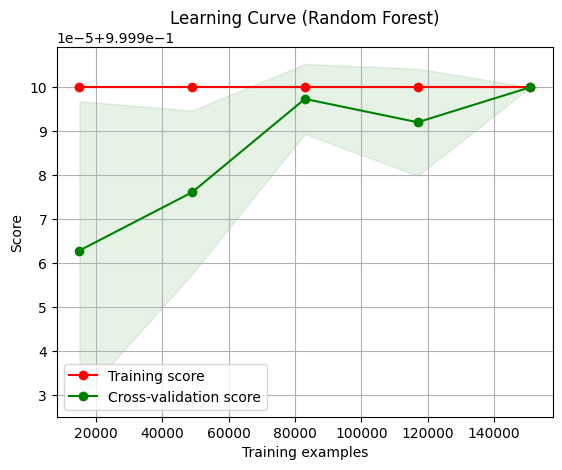

In [33]:
# Tham số của Learning Curve
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Vẽ biểu đồ Learning Curve (dùng X_train và y_train)
plot_learning_curve(model_RF, "Learning Curve (Random Forest)", X_train, y_train, cv=cv, n_jobs=-1)
plt.show()

***3.XGBOOST***

In [34]:
#XGBOOST
X_train, X_test, y_train, y_test = preprocess_data(data)

model_XGB = xgb.XGBClassifier(random_state=42, n_estimators = 200)
model_XGB.fit(X_train, y_train)

y_train_pred = model_XGB.predict(X_train)
y_test_pred = model_XGB.predict(X_test)

print_scores(y_train, y_train_pred)
print_scores(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80821
           1       1.00      1.00      1.00    107815

    accuracy                           1.00    188636
   macro avg       1.00      1.00      1.00    188636
weighted avg       1.00      1.00      1.00    188636

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



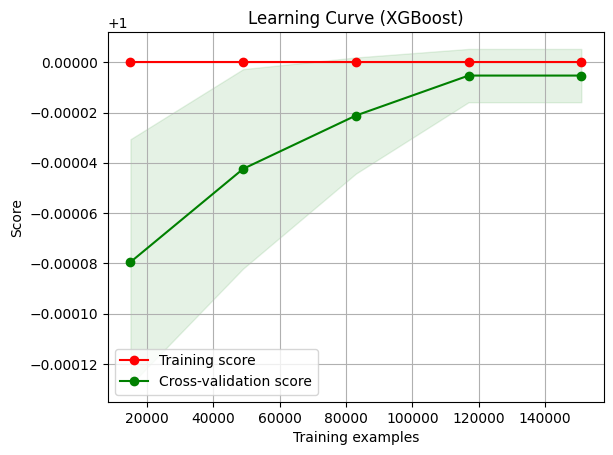

In [35]:
# Tham số của Learning Curve
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Vẽ biểu đồ Learning Curve (dùng X_train và y_train)
plot_learning_curve(model_XGB, "Learning Curve (XGBoost)", X_train, y_train, cv=cv, n_jobs=-1)
plt.show()

***3.Naive Bayes***

In [36]:
X_train, X_test, y_train, y_test = preprocess_data(data)

model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

y_train_pred = model_nb.predict(X_train)
y_test_pred = model_nb.predict(X_test)

print_scores(y_train, y_train_pred)
print_scores(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     80821
           1       1.00      1.00      1.00    107815

    accuracy                           1.00    188636
   macro avg       1.00      1.00      1.00    188636
weighted avg       1.00      1.00      1.00    188636

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



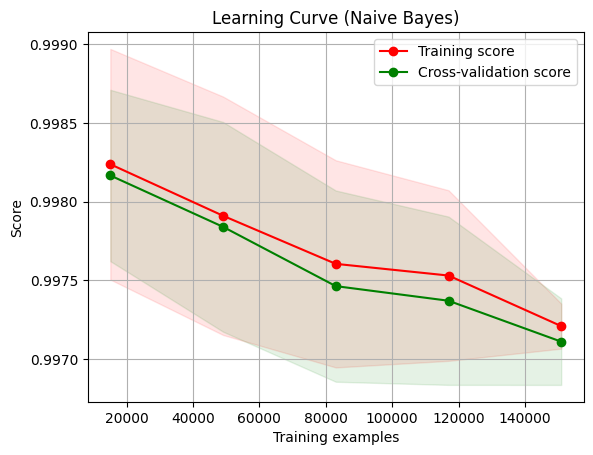

In [37]:
# Tham số của Learning Curve
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Vẽ biểu đồ Learning Curve (dùng X_train và y_train)
plot_learning_curve(model_nb, "Learning Curve (Naive Bayes)", X_train, y_train, cv=cv, n_jobs=-1)
plt.show()

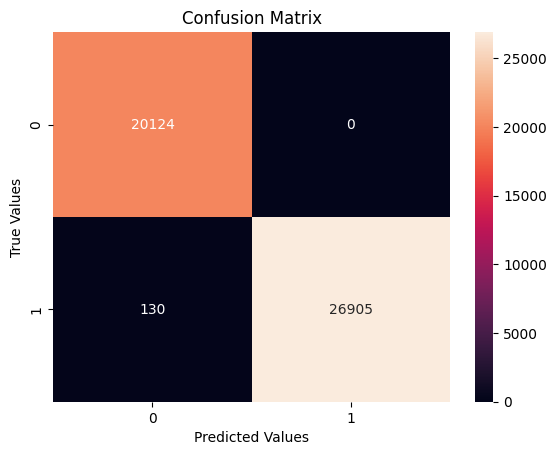

In [38]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, xticklabels=["0", "1"], yticklabels=["0", "1"], annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

***NHẬN XÉT: NAYVE BAYES CÓ HIỆU SUẤT RẤT CAO, VÀ ÍT CÓ DẤU HIỆU OVERFITTING HƠN SO VỚI CÁC MODEL KIA***